In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

In [5]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [6]:
X_train.shape

(25000, 50)

In [14]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=2, input_length=50))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
model.build(input_shape=(None, None))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, None, 2)        │        20,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 32)             │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,153 (82.63 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10


I0000 00:00:1750354521.745849    3014 service.cc:152] XLA service 0x32d4c280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750354521.745913    3014 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-06-19 17:35:21.800201: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750354521.990811    3014 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/782 ━━━━━━━━━━━━━━━━━━━━ 24:33 2s/step - accuracy: 0.5312 - loss: 0.6968

I0000 00:00:1750354522.516883    3014 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.5166 - loss: 0.6927 - val_accuracy: 0.5648 - val_loss: 0.6759
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6536 - loss: 0.6208 - val_accuracy: 0.7901 - val_loss: 0.4531
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8393 - loss: 0.3675 - val_accuracy: 0.7870 - val_loss: 0.4584
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8762 - loss: 0.3056 - val_accuracy: 0.7799 - val_loss: 0.5002
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8974 - loss: 0.2607 - val_accuracy: 0.7699 - val_loss: 0.5421
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9127 - loss: 0.2299 - val_accuracy: 0.7723 - val_loss: 0.5528
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9176 - loss: 0.2203 - val_accuracy: 0.7722 - val_loss: 0.6507
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9295 - loss: 0.1980 - val_accuracy

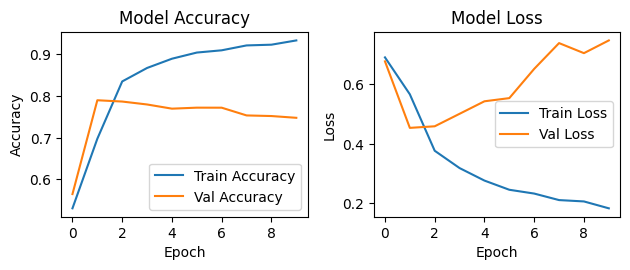

In [24]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()